In [1]:
import numpy as np
# from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import pandas as pd

# za normalizaciju
from sklearn import preprocessing

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

# rad sa arff fajlovima
#import arff

# grafici
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# importujemo neighbors modul
from sklearn import neighbors

# 
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# Cross validation attempts to avoid overfitting while still 
# producing a prediction for each observation dataset.
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

# Compute precision, recall, F-measure and support

# prognozirani pozitivni/negativni koji su zaista pozitivni od svih prognoziranih pozitivnih/negativnih 
# The precision is the ratio tp / (tp + fp) where tp is the number 
# of true positives and fp the number of false positives. 
# The precision is intuitively the ability of the classifier 
# to not label a sample as positive if it is negative

# odziv?
# => prognozirani pozitivni/negativni koji su zaista pozitivni od ukupno pozitivnih/negativnih
# The recall is the ratio tp / (tp + fn) where tp is the number 
# of true positives and fn the number of false negatives. 
# The recall is intuitively the ability of the classifier to find all the positive samples

# The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, 
# where an F-beta score reaches its best value at 1 and worst score at 0

# The F-beta score weights the recall more than the precision by a factor of beta. 
# beta = 1.0 means recall and precision are equally important

# svi koji pripadaju datoj klasi
# The support is the number of occurrences of each class in y_test

from sklearn.metrics import classification_report

# ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# oversampling
from imblearn.over_sampling import SMOTE

from collections import Counter

# feature selection
# from sklearn.feature_selection import SelectPercentile, f_classif

from sklearn.ensemble import ExtraTreesClassifier

In [2]:
from arff2pandas import a2p
    
with open('JM1.arff') as f:
    df = a2p.load(f)

print(df.shape)

(10878, 22)


In [3]:
# uklanjamo instance koje imaju nedostajuce vrednosti
df = df.dropna()
print(df.shape)

(10878, 22)


In [4]:
df = df.drop(columns = ['CYCLOMATIC_COMPLEXITY@NUMERIC', 'DESIGN_COMPLEXITY@NUMERIC', 'ESSENTIAL_COMPLEXITY@NUMERIC', 'BRANCH_COUNT@NUMERIC'])

In [5]:
df['Defective@{Y,N}'].value_counts()

N    8776
Y    2102
Name: Defective@{Y,N}, dtype: int64

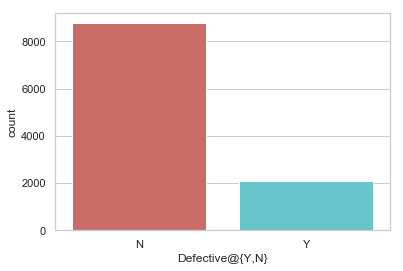

In [6]:
sns.countplot(x='Defective@{Y,N}', data=df, palette='hls')
figname = 'raspodela.png'
plt.savefig(figname)
plt.show()

In [7]:
# kodiramo Y/N u 1/0
df['Defective@{Y,N}'] = pd.factorize(df['Defective@{Y,N}'])[0]

In [8]:
# ciljna kolona(defects@{false, true})
y_cols=['Defective@{Y,N}']

# lista atributa
X_cols=[i for i in df.columns if i not in y_cols]

In [9]:
X=df[X_cols]
y=df[y_cols]

In [10]:
np.set_printoptions(suppress='True')

In [11]:
#X_scaled = preprocessing.scale(X)

In [12]:
#X_scaled[:, 0]

In [13]:
#X_scaled[1]

In [14]:
X.head(5)

,LOC_BLANK@NUMERIC,LOC_CODE_AND_COMMENT@NUMERIC,LOC_COMMENTS@NUMERIC,LOC_EXECUTABLE@NUMERIC,HALSTEAD_CONTENT@NUMERIC,HALSTEAD_DIFFICULTY@NUMERIC,HALSTEAD_EFFORT@NUMERIC,HALSTEAD_ERROR_EST@NUMERIC,HALSTEAD_LENGTH@NUMERIC,HALSTEAD_LEVEL@NUMERIC,HALSTEAD_PROG_TIME@NUMERIC,HALSTEAD_VOLUME@NUMERIC,NUM_OPERANDS@NUMERIC,NUM_OPERATORS@NUMERIC,NUM_UNIQUE_OPERANDS@NUMERIC,NUM_UNIQUE_OPERATORS@NUMERIC,LOC_TOTAL@NUMERIC
0,39.0,1.0,6.0,656.0,114.78,174.22,3483952.81,6.67,2702.0,0.01,193552.92,19997.18,784.0,1918.0,117.0,52.0,706.0
1,447.0,12.0,157.0,2824.0,210.28,384.45,31079782.27,26.95,8441.0,0.00,1726654.57,80843.08,3021.0,5420.0,609.0,155.0,3442.0
2,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1129.0
3,164.0,10.0,58.0,1588.0,202.98,213.53,9254819.86,14.45,4828.0,0.00,514156.64,43342.31,1730.0,3172.0,407.0,102.0,1824.0
4,37.0,8.0,42.0,133.0,108.14,46.32,232043.52,1.67,685.0,0.02,12891.31,5009.32,295.0,390.0,121.0,38.0,222.0


In [15]:
# X = preprocessing.normalize(X, axis=0)
X = preprocessing.scale(X)

In [16]:
X[0]

array([ 3.44767987,  0.32972654,  0.36189414, 10.56178454,  2.47905561,
        8.55265406,  7.93372817,  9.97052766, 10.36876459, -0.78250221,
        7.9337276 ,  9.96394289,  7.34996544, 12.20895324,  3.75897224,
        4.06385466,  8.66689787])

In [17]:
X[1]

array([44.36929914,  6.09370285, 17.11940989, 46.92260706,  5.25338243,
       19.78747958, 71.44734356, 41.34209567, 33.36560363, -0.84501962,
       71.44734364, 41.33878903, 29.64092647, 35.32170728, 22.20786688,
       14.31792952, 44.38018219])

In [18]:
y = y.values.ravel()

In [19]:
# pre oversampling-a

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
k_scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))

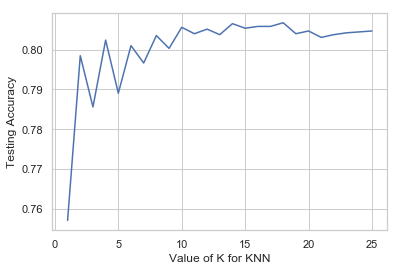

In [22]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
figname = 'KNN_basic_data_k_accuracy.png'
plt.savefig(figname)
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8053768382352942


In [24]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = knn
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X, np.ravel(y), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.775631883
standard deviation: 0.295945158


In [25]:
#results.

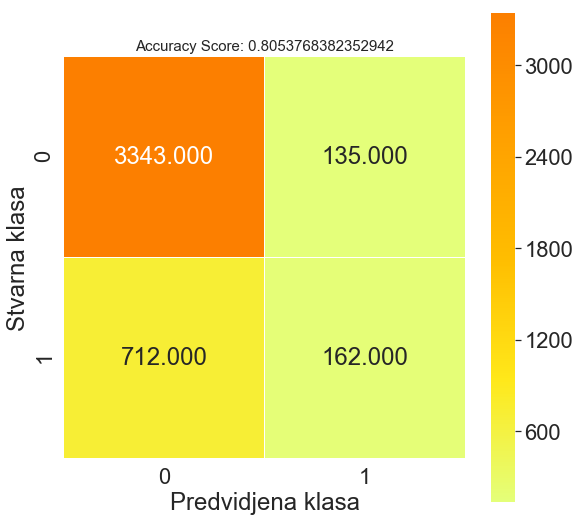

In [26]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'KNN_basic_data_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3478
           1       0.55      0.19      0.28       874

   micro avg       0.81      0.81      0.81      4352
   macro avg       0.68      0.57      0.58      4352
weighted avg       0.77      0.81      0.76      4352



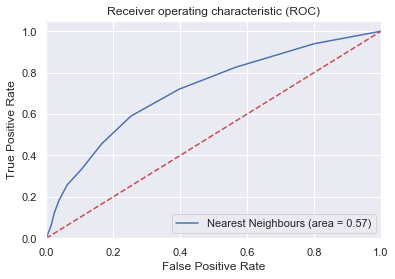

In [28]:
# The receiver operating characteristic (ROC) curve is 
# another common tool used with binary classifiers. 
# The dotted line represents the ROC curve of a purely 
# random classifier; a good classifier stays as far away 
# from that line as possible (toward the top-left corner)

logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Nearest Neighbours (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'KNN_basic_data_ROC.png'
plt.savefig(figname)
plt.show()

In [29]:
# oversampling

In [30]:
X_resampled, y_resampled = SMOTE(kind="svm").fit_sample(X, y)

In [31]:
print(sorted(Counter(y_resampled).items()))

[(0, 8776), (1, 8776)]


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

In [33]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
k_scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))

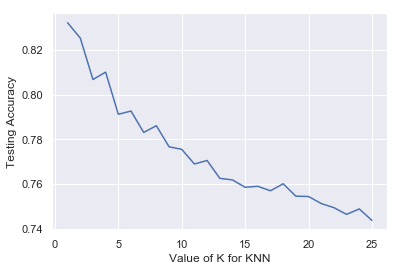

In [34]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
sns.set(font_scale=1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
figname = 'KNN_oversampled_k_accuracy.png'
plt.savefig(figname)
plt.show()

In [35]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8067226890756303


In [36]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = knn
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_resampled, np.ravel(y_resampled), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.790117465
standard deviation: 0.105437015


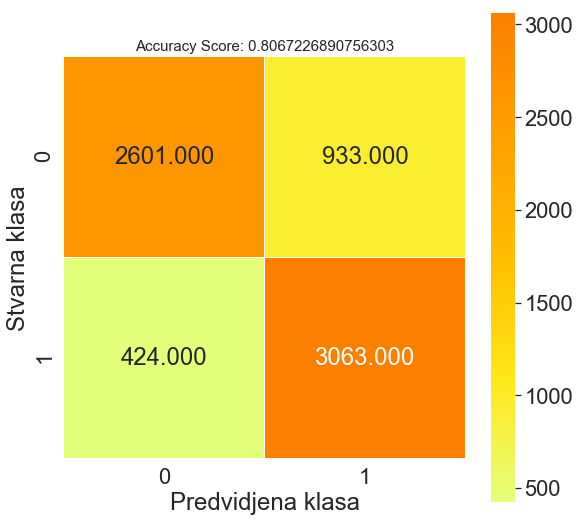

In [37]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'KNN_oversampled_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.74      0.79      3534
           1       0.77      0.88      0.82      3487

   micro avg       0.81      0.81      0.81      7021
   macro avg       0.81      0.81      0.81      7021
weighted avg       0.81      0.81      0.81      7021



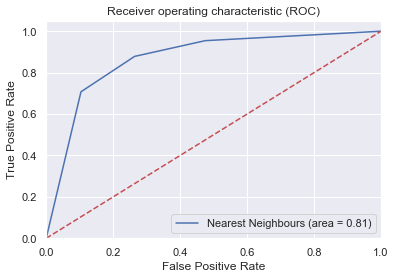

In [39]:
logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Nearest Neighbours (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'KNN_oversampled_ROC.png'
plt.savefig(figname)
plt.show()

In [40]:
# izbor atributa

In [41]:
X_indices = np.arange(X.shape[-1])

In [42]:
#selector = SelectPercentile(f_classif, percentile=60)
#selector.fit(X, y)
#X_transformed = selector.transform(X)

selector = ExtraTreesClassifier(n_estimators=100)
selector.fit(X, y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
print(selector.feature_importances_)

[0.06656376 0.03174885 0.04667114 0.0678375  0.06075375 0.05488422
 0.05199579 0.04578096 0.05732811 0.04579533 0.05223376 0.05648852
 0.05737596 0.06198902 0.06011278 0.05738094 0.12505959]


In [44]:
feature_importances = selector.feature_importances_

In [45]:
#scores = -np.log10(selector.pvalues_)
#scores /= scores.max()

<BarContainer object of 17 artists>

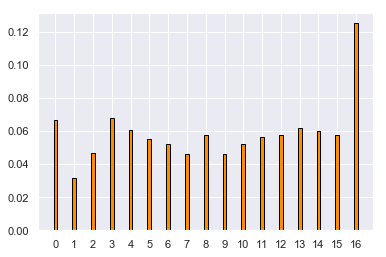

In [46]:
sns.set(font_scale=1)
plt.xticks(np.arange(0, len(X_indices)+1, 1.0))
plt.bar(X_indices , selector.feature_importances_, width=.2, label=r'ExtraTreesClasifier', color='darkorange',
        edgecolor='black')

In [47]:
#ind = np.argpartition(scores, -10)[-10:]
ind = np.argpartition(feature_importances, -10)[-10:]
print(df.columns[ind])

Index(['HALSTEAD_VOLUME@NUMERIC', 'HALSTEAD_LENGTH@NUMERIC',
       'NUM_UNIQUE_OPERATORS@NUMERIC', 'NUM_OPERANDS@NUMERIC',
       'NUM_UNIQUE_OPERANDS@NUMERIC', 'HALSTEAD_CONTENT@NUMERIC',
       'NUM_OPERATORS@NUMERIC', 'LOC_BLANK@NUMERIC', 'LOC_EXECUTABLE@NUMERIC',
       'LOC_TOTAL@NUMERIC'],
      dtype='object')


In [48]:
to_remove = [a for a in X_indices if a not in ind] 

In [49]:
X_transformed = np.delete(X, to_remove, axis=1)

In [50]:
# posle izbora atributa i oversampling-a 

In [51]:
X_resampled, y_resampled = SMOTE().fit_sample(X_transformed, y)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4, random_state=42)

In [53]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
k_scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    k_scores.append(metrics.accuracy_score(y_test, y_pred))

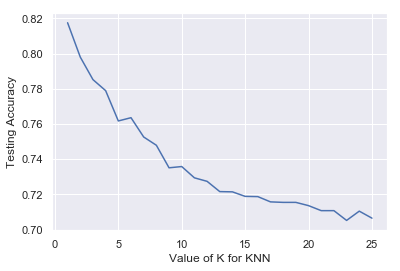

In [54]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
sns.set(font_scale=1)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
figname = 'KNN_feature_selection_oversampled_k_accuracy.png'
plt.savefig(figname)
plt.show()

In [55]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, np.ravel(y_train))
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.7852157812277454


In [56]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = knn
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_resampled, np.ravel(y_resampled), cv=kfold, scoring=scoring)
print("10-fold cross validation: ")
print("average accuracy: %.9f" % (results.mean()))
print("standard deviation: %.9f" % (results.std()))

10-fold cross validation: 
average accuracy: 0.777577991
standard deviation: 0.119007082


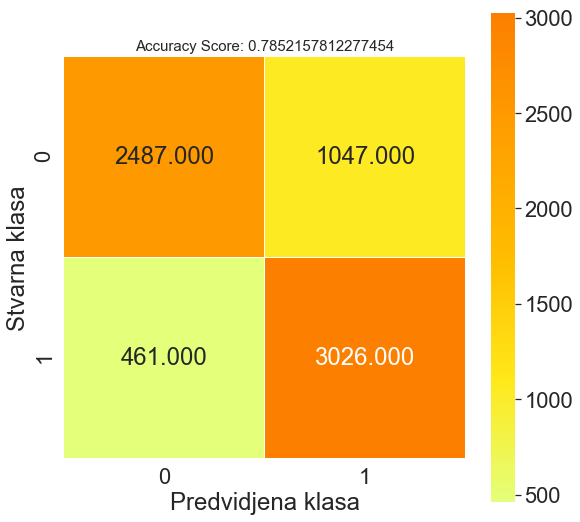

In [57]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.figure(figsize=(9,9))
sns.set(font_scale=2)
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Wistia');
plt.ylabel('Stvarna klasa');
plt.xlabel('Predvidjena klasa');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);
figname = 'KNN_feature_selection_oversampled_confussion_matrix.png'
plt.savefig(figname)
plt.show()

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.70      0.77      3534
           1       0.74      0.87      0.80      3487

   micro avg       0.79      0.79      0.79      7021
   macro avg       0.79      0.79      0.78      7021
weighted avg       0.79      0.79      0.78      7021



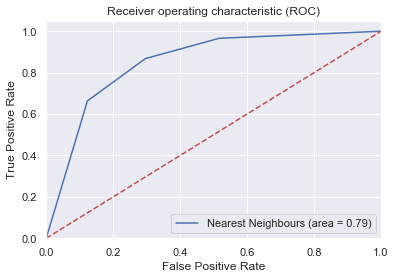

In [59]:
logit_roc_auc = roc_auc_score(y_test, knn.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
sns.set(font_scale=1)
plt.plot(fpr, tpr, label='Nearest Neighbours (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
figname = 'KNN_feature_selectionoversampled_ROC.png'
plt.savefig(figname)
plt.show()